In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dframe= pd.read_csv('C:/Users/Harsh/Desktop/npcl.5_id_data.csv')

In [7]:
id=dframe['location_id'].unique()

In [8]:
# dframe.columns

In [9]:
d_frame=dframe[['data.grid_reading_kwh','data.grid_kwh_unit','data.creation_time','data.status',
'data.meter_sr_no','data.error_reason','data.R_voltage','data.Y_volatge',
'data.B_voltage', 'data.r_current', 'data.y_current','data.b_current','site_id',
'location_id','data.cumm_pf','data.instant_cum_Kw', 'data.instant_cum_Kva','data.frequency']]

In [10]:
# combined_df['data.cumm_pf'].plot(figsize=(18,5))

checks

In [11]:
# Status "P"
combined_df=d_frame[d_frame['data.status']== "P"]

#no consumption
combined_df.loc[combined_df['data.error_reason'] == 'No Consumption', 'data.grid_kwh_unit'] = 0

# null values
if combined_df.isnull().sum().sum()>0:
    combined_df.dropna(inplace=True)

# special character
def special_char():
    special_character_pattern = r'[!@#$%^&*()]'
    rows_with_special_chars = combined_df[combined_df['location_id'].str.contains(special_character_pattern, regex=True)]
    return ( rows_with_special_chars)
if combined_df['location_id'].dtype != 'int64':
    special_char()

#  creation time relabelling 
# combined_df['data.creation_time']=pd.to_datetime(combined_df['data.creation_time'])

# integer conversion
combined_df['data.grid_reading_kwh']=combined_df['data.grid_reading_kwh'].round()

In [12]:
final_lst=[]
for each_id in id:
    df=combined_df[combined_df['location_id'] == each_id ]
    df['data.creation_time']=pd.to_datetime(df['data.creation_time'])
    df.set_index(['data.creation_time'],drop=True, inplace=True)
    
    # dfresample=df[['data.grid_reading_kwh']].resample(rule='1H').max()

    # df['units']=round((df['data.grid_reading_kwh']-df['data.grid_reading_kwh'].shift(1)),2)
    # df.dropna(inplace=True)
    # df = df[df['units'] >= 0]
    df_resample=df[['data.grid_reading_kwh']].resample(rule='1H').max()
    df_resample['data.grid_reading_kwh'].interpolate(inplace=True)
    df_resample['grid_reading']=round(df_resample['data.grid_reading_kwh'])
    df_resample['unit']=df_resample['grid_reading']-df_resample['grid_reading'].shift(1)
    df_resample = df_resample[df_resample['unit'] >= 0]
    df_resample.drop(['data.grid_reading_kwh'],axis=1,inplace=True)
    
    

    final_lst.append(df_resample)

final_df = pd.concat(final_lst)

In [13]:
df=final_lst[4]

In [14]:
id

array([500000010232, 500000010632, 500000010732, 500000010832,
       500000010032], dtype=int64)

In [15]:
combined_df['data.creation_time']=pd.to_datetime(combined_df['data.creation_time'])
combined_df.set_index(['data.creation_time'],drop=True, inplace=True)
    

In [16]:
a=combined_df[combined_df['location_id']==500000010232]

In [17]:
a[0:60]

,data.grid_reading_kwh,data.grid_kwh_unit,data.status,data.meter_sr_no,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,site_id,location_id,data.cumm_pf,data.instant_cum_Kw,data.instant_cum_Kva,data.frequency
data.creation_time,,,,,,,,,,,,,,,,,
2021-05-01 00:01:42,164.0,0.0,P,DAL0000950,No Consumption,234.7,239.6,228.4,1.30,0.0,0.83,6075bb51153a20.38235471,500000010232,0.98,0.38,0.39,50.2
2021-05-01 00:03:46,164.0,0.0,P,DAL0000950,No Consumption,235.2,239.4,226.7,1.19,0.0,0.83,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.2
2021-05-01 00:05:50,164.0,0.0,P,DAL0000950,No Consumption,235.2,239.4,226.7,1.19,0.0,0.83,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.2
2021-05-01 00:07:57,164.0,0.0,P,DAL0000950,No Consumption,234.6,238.2,227.9,1.19,0.0,0.82,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.1
2021-05-01 00:10:02,164.0,0.0,P,DAL0000950,No Consumption,234.6,238.2,227.9,1.19,0.0,0.82,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.1
2021-05-01 00:12:06,164.0,0.0,P,DAL0000950,No Consumption,234.1,237.8,227.5,1.19,0.0,0.82,6075bb51153a20.38235471,500000010232,0.98,0.36,0.37,50.0
2021-05-01 00:14:13,164.0,0.0,P,DAL0000950,No Consumption,235.2,237.4,227.7,1.20,0.0,0.79,6075bb51153a20.38235471,500000010232,0.98,0.36,0.37,50.1
2021-05-01 00:16:20,164.0,0.0,P,DAL0000950,No Consumption,235.2,237.4,227.7,1.20,0.0,0.79,6075bb51153a20.38235471,500000010232,0.98,0.36,0.37,50.1
2021-05-01 00:18:25,164.0,0.0,P,DAL0000950,No Consumption,235.4,236.5,228.4,1.19,0.0,0.78,6075bb51153a20.38235471,500000010232,0.98,0.36,0.37,50.1


In [34]:
b=a[a['data.cumm_pf']<0.8]

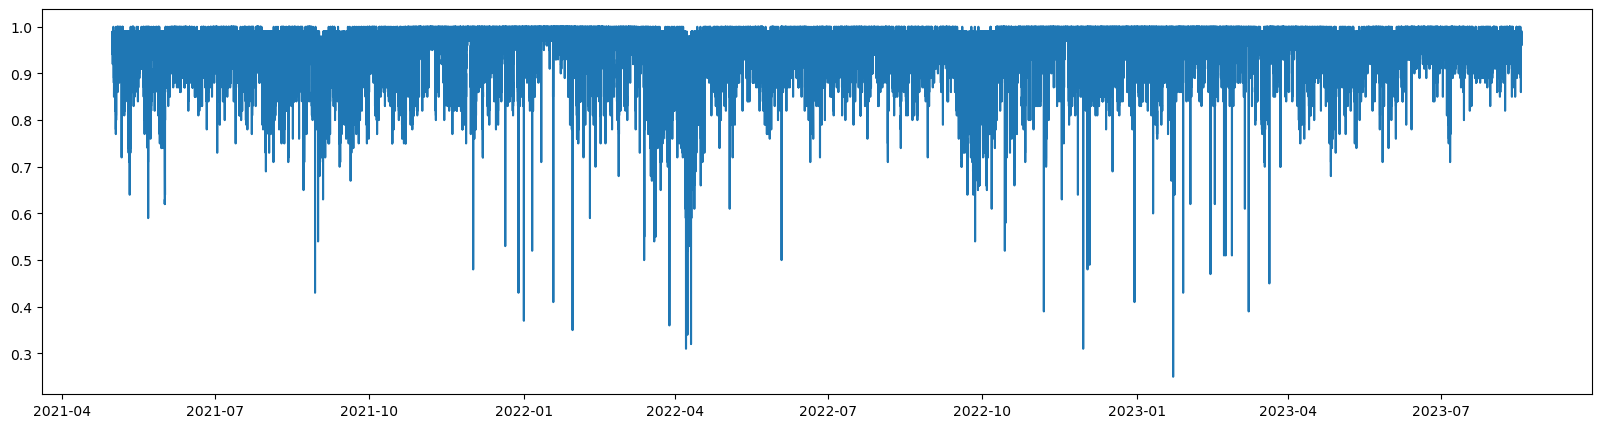

In [30]:
plt.plot(a['data.cumm_pf'])

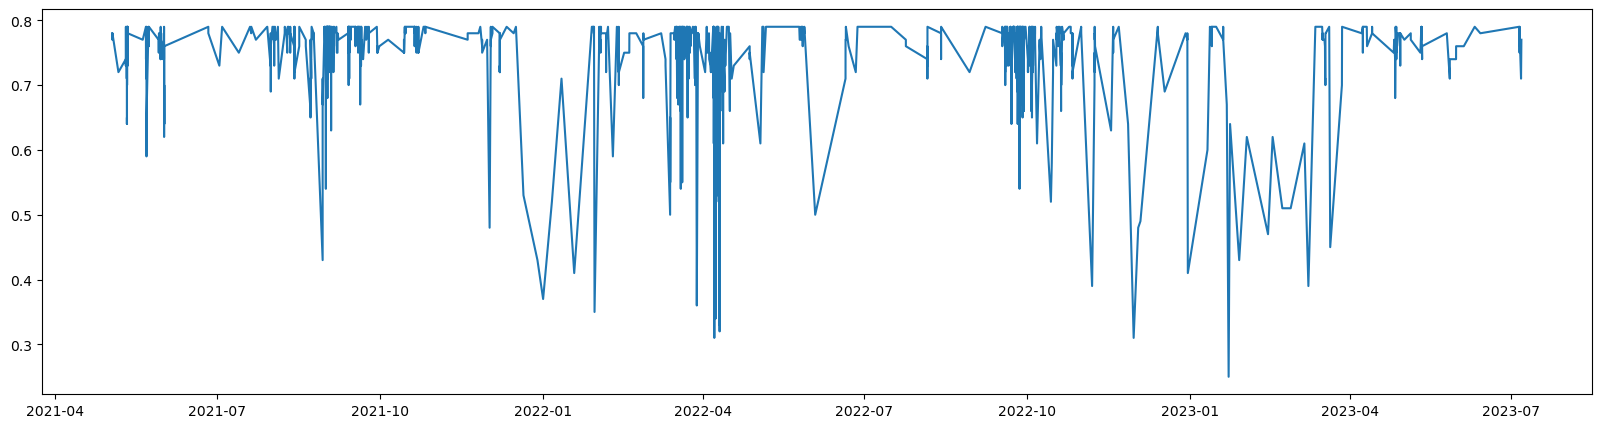

In [35]:
plt.plot(b['data.cumm_pf'])

In [20]:
b[0:60]

,data.grid_reading_kwh,data.grid_kwh_unit,data.creation_time,data.status,data.meter_sr_no,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,site_id,location_id,data.cumm_pf,data.instant_cum_Kw,data.instant_cum_Kva,data.frequency
445,171.0,0.0,2021-05-01 15:28:48,P,DAL0000950,No Consumption,242.3,239.6,235.9,0.87,0.0,4.06,6075bb51153a20.38235471,500000010232,1.0,0.97,0.97,50.2
446,171.0,0.0,2021-05-01 15:30:52,P,DAL0000950,No Consumption,242.3,239.6,235.9,0.87,0.0,4.06,6075bb51153a20.38235471,500000010232,1.0,0.97,0.97,50.2
1549,203.0,0.0,2021-05-03 05:50:24,P,DAL0000950,No Consumption,244.3,244.6,240.4,9.53,0.0,1.67,6075bb51153a20.38235471,500000010232,1.0,2.68,2.68,50.2
1550,203.0,0.0,2021-05-03 05:52:29,P,DAL0000950,No Consumption,244.3,244.6,240.4,9.53,0.0,1.67,6075bb51153a20.38235471,500000010232,1.0,2.68,2.68,50.2
2061,218.0,1.0,2021-05-03 23:35:54,P,DAL0000950,Success,235.2,233.9,227.6,2.06,0.0,0.76,6075bb51153a20.38235471,500000010232,1.0,0.69,0.69,50.1
2062,218.0,0.0,2021-05-03 23:37:58,P,DAL0000950,No Consumption,235.2,233.9,227.6,2.06,0.0,0.76,6075bb51153a20.38235471,500000010232,1.0,0.69,0.69,50.1
2184,222.0,0.0,2021-05-04 03:56:02,P,DAL0000950,No Consumption,243.0,241.8,235.6,9.05,0.0,0.85,6075bb51153a20.38235471,500000010232,1.0,2.29,2.29,50.1
2185,222.0,0.0,2021-05-04 03:58:07,P,DAL0000950,No Consumption,243.0,241.8,235.6,9.05,0.0,0.85,6075bb51153a20.38235471,500000010232,1.0,2.29,2.29,50.1
2186,222.0,0.0,2021-05-04 04:00:11,P,DAL0000950,No Consumption,241.6,241.6,237.9,9.35,0.0,0.85,6075bb51153a20.38235471,500000010232,1.0,2.37,2.37,50.2
2187,222.0,0.0,2021-05-04 04:02:15,P,DAL0000950,No Consumption,241.6,241.6,237.9,9.35,0.0,0.85,6075bb51153a20.38235471,500000010232,1.0,2.37,2.37,50.2
